In [1]:
# Include a written description of three observable trends based on the data ... 
# I have also included print statements after each plot

#1. The higher the latitude in the northern hemisphere, the lower the temperature. This is not the case for the southern hemisphere.

#2. The cloudiness and the humidity of a city does not show a relationship with the latitude.

#3. The wind speed for all cities in dataset is usually between 0 and 10 mph. Only some cities in the northern hemisphere may have higher wind speeds of up to 20mph.

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
from citipy import citipy
import random

# Import open weather API Key
from api_keys import weather_api_key

## Generate Cities List

In [3]:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude
# Create empty lists for latitude and longitude

lat_list = []
long_list = []

# Latitude values range from -90° to +90°. Longitude values range from -180° to 180° 
# https://openweathermap.org/current#geo uses lat and long to 2.d.p

# Using a for loop to create random lats and longs and append to lists above
# https://pynative.com/python-get-random-float-numbers/#:~:text=Generate%20a%20random%20float%20number%20up%20to%202%20decimal%20places,-As%20you%20can&text=You%20can%20use%20the%20round,precision%20to%20two%20decimal%20places.


### NEED TO CHANGE RANGE HERE AND BELOW, DONE 60 FOR SPEED
for latlong in range(0,1350):
    lat_list.append(round(random.uniform(-90, 90), 2))   
    long_list.append(round(random.uniform(-180, 180), 2))    

In [4]:
# Testing lat and long lists
print(max(lat_list))
print(lat_list[11])
print(long_list[54])
print(len(lat_list))

89.83
-15.54
100.14
1350


In [5]:
# Selecting cities based on latitude and longitude lists
# Create empty list for city names
city_list = []

# Using city = citipy.nearest_city(22.99, 120.21) from Looking up with coordinates on https://github.com/wingchen/citipy

for i in range(0,1350):
    city = citipy.nearest_city(lat_list[i],long_list[i])
    city_list.append(city.city_name)

In [11]:
# Testing cities list
print(city_list[36])
print(len(city_list))

punta arenas
1350


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [13]:
## For example to see format, change number in [] if city not found

# Make request, store response, JSON-ify response
response_example = requests.get(query_url + city_list[36]).json()
# Pretty printing the response
print(json.dumps(response_example, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": -53.15,
        "lon": -70.9167
    },
    "dt": 1610601549,
    "id": 3874787,
    "main": {
        "feels_like": 4.51,
        "humidity": 82,
        "pressure": 1009,
        "temp": 10.78,
        "temp_max": 11,
        "temp_min": 10.56
    },
    "name": "Punta Arenas",
    "sys": {
        "country": "CL",
        "id": 8487,
        "sunrise": 1610613643,
        "sunset": 1610672671,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 310,
        "speed": 8.23
    }
}


In [14]:
# Set up lists to hold reponse info
city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = [] 
country = []
date = []

In [15]:
# Records start at 0
records = 0
# Sets start at 1
sets = 1

# Print statements at beginning 
print("Beginning Data Retrieval")    
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for y in city_list:
    # Make request, store response, JSON-ify response
    response = requests.get(query_url + y).json()
    
    # Records go up to 50
    if records < 50:
        records += 1
        
    # Sets don't have a limit, depends on how many cities in list
    else:
        sets += 1
        records = 0
        
    # Print statement has to go here or record numbers skip when city not found. Not sure why
    print(f"Processing Record {records} of Set {sets} | {y}")

    try:
        city.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
                          
    except:
        print("City not found. Skipping...")
        pass

# Print statements at end
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | rungata
City not found. Skipping...
Processing Record 2 of Set 1 | zhigansk
Processing Record 3 of Set 1 | tessalit
Processing Record 4 of Set 1 | evensk
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | juneau
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | mubende
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | san ignacio
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | kjollefjord
Processing Record 21 of Set 1 | tambul
City not found. Skipping...
Processing Record 22 of S

Processing Record 32 of Set 4 | omboue
Processing Record 33 of Set 4 | mataura
Processing Record 34 of Set 4 | ushuaia
Processing Record 35 of Set 4 | kaitangata
Processing Record 36 of Set 4 | puerto ayora
Processing Record 37 of Set 4 | kodiak
Processing Record 38 of Set 4 | ushuaia
Processing Record 39 of Set 4 | souillac
Processing Record 40 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 41 of Set 4 | the valley
Processing Record 42 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 43 of Set 4 | tangermunde
Processing Record 44 of Set 4 | ende
Processing Record 45 of Set 4 | ushuaia
Processing Record 46 of Set 4 | butaritari
Processing Record 47 of Set 4 | alofi
Processing Record 48 of Set 4 | saskylakh
Processing Record 49 of Set 4 | hobart
Processing Record 50 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 0 of Set 5 | san policarpo
Processing Record 1 of Set 5 | lazaro cardenas
Processing Record 2 of Set 5 | mat

Processing Record 14 of Set 8 | ponta do sol
Processing Record 15 of Set 8 | thompson
Processing Record 16 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 17 of Set 8 | isangel
Processing Record 18 of Set 8 | bandarbeyla
Processing Record 19 of Set 8 | labuhan
Processing Record 20 of Set 8 | the valley
Processing Record 21 of Set 8 | lebu
Processing Record 22 of Set 8 | mataura
Processing Record 23 of Set 8 | qaanaaq
Processing Record 24 of Set 8 | guerrero negro
Processing Record 25 of Set 8 | xining
Processing Record 26 of Set 8 | puerto ayora
Processing Record 27 of Set 8 | aklavik
Processing Record 28 of Set 8 | nabire
Processing Record 29 of Set 8 | mayo
Processing Record 30 of Set 8 | graham
Processing Record 31 of Set 8 | dikson
Processing Record 32 of Set 8 | saskylakh
Processing Record 33 of Set 8 | charters towers
Processing Record 34 of Set 8 | busselton
Processing Record 35 of Set 8 | hermanus
Processing Record 36 of Set 8 | rikitea
Processing Record 37

Processing Record 47 of Set 11 | kruisfontein
Processing Record 48 of Set 11 | saint-philippe
Processing Record 49 of Set 11 | xinmin
Processing Record 50 of Set 11 | ngunguru
Processing Record 0 of Set 12 | rikitea
Processing Record 1 of Set 12 | bredasdorp
Processing Record 2 of Set 12 | longyearbyen
Processing Record 3 of Set 12 | ponta do sol
Processing Record 4 of Set 12 | esperance
Processing Record 5 of Set 12 | notodden
Processing Record 6 of Set 12 | portpatrick
City not found. Skipping...
Processing Record 7 of Set 12 | de-kastri
Processing Record 8 of Set 12 | jamestown
Processing Record 9 of Set 12 | mar del plata
Processing Record 10 of Set 12 | bredasdorp
Processing Record 11 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 12 | luena
Processing Record 13 of Set 12 | albany
Processing Record 14 of Set 12 | winneba
Processing Record 15 of Set 12 | sao filipe
Processing Record 16 of Set 12 | jinchang
Processing Record 17 of Set 12 | samarai
P

Processing Record 28 of Set 15 | huarmey
Processing Record 29 of Set 15 | corning
Processing Record 30 of Set 15 | trincomalee
Processing Record 31 of Set 15 | kaitangata
Processing Record 32 of Set 15 | quatre cocos
Processing Record 33 of Set 15 | castro
Processing Record 34 of Set 15 | cape town
Processing Record 35 of Set 15 | ushuaia
Processing Record 36 of Set 15 | ushuaia
Processing Record 37 of Set 15 | general roca
Processing Record 38 of Set 15 | airai
Processing Record 39 of Set 15 | kapaa
Processing Record 40 of Set 15 | hobart
Processing Record 41 of Set 15 | yaan
Processing Record 42 of Set 15 | luderitz
Processing Record 43 of Set 15 | whitehorse
Processing Record 44 of Set 15 | taolanaro
City not found. Skipping...
Processing Record 45 of Set 15 | kodiak
Processing Record 46 of Set 15 | cape town
Processing Record 47 of Set 15 | kaseda
Processing Record 48 of Set 15 | grindavik
Processing Record 49 of Set 15 | cape town
Processing Record 50 of Set 15 | kamenskoye
City n

Processing Record 7 of Set 19 | kaitangata
Processing Record 8 of Set 19 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 19 | hilo
Processing Record 10 of Set 19 | saleaula
City not found. Skipping...
Processing Record 11 of Set 19 | husavik
Processing Record 12 of Set 19 | clyde river
Processing Record 13 of Set 19 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 19 | butaritari
Processing Record 15 of Set 19 | limbe
Processing Record 16 of Set 19 | eregli
Processing Record 17 of Set 19 | barrow
Processing Record 18 of Set 19 | thompson
Processing Record 19 of Set 19 | ushuaia
Processing Record 20 of Set 19 | huoqiu
Processing Record 21 of Set 19 | mataura
Processing Record 22 of Set 19 | pacific grove
Processing Record 23 of Set 19 | yartsevo
Processing Record 24 of Set 19 | norman wells
Processing Record 25 of Set 19 | port hardy
Processing Record 26 of Set 19 | qom
Processing Record 27 of Set 19 | wloszczowa
Processing Record 28 of Set 19 |

Processing Record 43 of Set 22 | new norfolk
Processing Record 44 of Set 22 | saskylakh
Processing Record 45 of Set 22 | taolanaro
City not found. Skipping...
Processing Record 46 of Set 22 | belaya gora
Processing Record 47 of Set 22 | tambovka
Processing Record 48 of Set 22 | acarau
Processing Record 49 of Set 22 | nikolskoye
Processing Record 50 of Set 22 | taolanaro
City not found. Skipping...
Processing Record 0 of Set 23 | stornoway
Processing Record 1 of Set 23 | barrow
Processing Record 2 of Set 23 | ushuaia
Processing Record 3 of Set 23 | grajau
Processing Record 4 of Set 23 | atar
Processing Record 5 of Set 23 | hilo
Processing Record 6 of Set 23 | katsuura
Processing Record 7 of Set 23 | mayo
Processing Record 8 of Set 23 | jamestown
Processing Record 9 of Set 23 | khonuu
City not found. Skipping...
Processing Record 10 of Set 23 | aklavik
Processing Record 11 of Set 23 | rikitea
Processing Record 12 of Set 23 | puerto ayora
Processing Record 13 of Set 23 | griffith
Processi

Processing Record 23 of Set 26 | busselton
Processing Record 24 of Set 26 | saint anthony
Processing Record 25 of Set 26 | hobart
Processing Record 26 of Set 26 | maravilha
Processing Record 27 of Set 26 | cabo san lucas
Processing Record 28 of Set 26 | bethel
Processing Record 29 of Set 26 | shenjiamen
Processing Record 30 of Set 26 | jalu
Processing Record 31 of Set 26 | taolanaro
City not found. Skipping...
Processing Record 32 of Set 26 | east london
Processing Record 33 of Set 26 | grandview
Processing Record 34 of Set 26 | rikitea
Processing Record 35 of Set 26 | ilulissat
Processing Record 36 of Set 26 | puerto ayora
Processing Record 37 of Set 26 | alanya
Processing Record 38 of Set 26 | jamestown
Processing Record 39 of Set 26 | carnarvon
Processing Record 40 of Set 26 | cape town
Processing Record 41 of Set 26 | pitimbu
Processing Record 42 of Set 26 | new norfolk
Processing Record 43 of Set 26 | union de tula
Processing Record 44 of Set 26 | castro
Processing Record 45 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Creating a data frame from the lists I created above and appended values to
weather_dict = {
    "City" : city,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
}
weather_df = pd.DataFrame(weather_dict)

# Dropping duplicates of city names
## Maybe I could have done this earlier when appending city names so previous step doesn't take as long?
weather_df = weather_df.drop_duplicates("City", keep="last")

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-40.57,79,72,4.73,RU,1610601553
2,Evensk,61.9500,159.2333,-28.21,74,76,2.59,RU,1610601554
5,Juneau,58.3019,-134.4197,3.00,87,75,3.60,US,1610601407
7,Mubende,0.5606,31.3900,20.24,64,79,0.12,UG,1610601558
9,San Ignacio,17.1561,-89.0714,22.00,88,75,1.01,BZ,1610601559


In [17]:
# Exporting the city data into a .csv. this should be stored in output_data folder
weather_df.to_csv("output_data/cities.csv", encoding="utf-8", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
over_100 = weather_df.index[weather_df["Humidity"]>100]
over_100

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


### I don't think I need to do this, unless there are cities with humidity over 100% when I increase range for final submission

In [20]:
# First time doing this realised there were duplicates in the city names, drop duplicates above and recheck 
weather_df["City"].value_counts()

Saint-Philippe          1
Tigil'                  1
Livingston              1
Makkah al Mukarramah    1
General Roca            1
                       ..
Alyangula               1
Kamen'-na-Obi           1
Atuona                  1
Nowa Ruda               1
Saint Anthony           1
Name: City, Length: 540, dtype: int64

In [21]:
# With 1350 set as ranges for beginning of code, city count > 500
weather_df.count()

City          540
Lat           540
Lng           540
Max Temp      540
Humidity      540
Cloudiness    540
Wind Speed    540
Country       540
Date          540
dtype: int64

In [22]:
column_names = weather_df.columns
column_names

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [23]:
# Basic statistical details, for all column headings
summary_df = weather_df[column_names].describe()
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,5.400000e+02
mean,19.778702,16.549650,9.919296,74.692593,54.001852,3.420907,1.610602e+09
std,33.766779,91.126003,18.138949,19.677406,39.173346,2.398395,2.531176e+02
min,-54.800000,-175.200000,-43.940000,1.000000,0.000000,0.120000,1.610601e+09
25%,-7.537450,-59.966675,0.000000,68.000000,14.750000,1.540000,1.610602e+09
50%,20.915500,20.003100,15.570000,79.000000,64.000000,3.005000,1.610602e+09
75%,48.898375,101.569375,23.940000,89.000000,93.000000,4.630000,1.610602e+09
max,78.218600,179.316700,44.000000,100.000000,100.000000,15.360000,1.610602e+09


In [24]:
# To see if I will need to convert to float
weather_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object

## Latitude vs. Temperature Plot

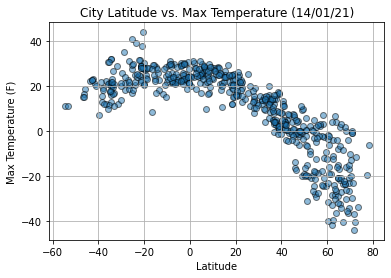

In [25]:
# Both latitude and temperature are already float objects
x1_values = weather_df["Lat"]
y1_values = weather_df["Max Temp"]

# Plot scatter plot
plt.scatter(x1_values, y1_values, marker="o", edgecolors="black", alpha=0.5)

# Adding Labels
plt.title("City Latitude vs. Max Temperature (14/01/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Adding the grid
plt.grid()

## Remember to save PNG
plt.savefig("images/Latitude_vs_MaxTemp.png")

# Show plot
plt.show()

In [26]:
## After each plot add a sentence or two explaining what the code is and analyzing.
print("The scatter plot shows that cities with a negative lagtitude (in the southern hemisphere) are warmer than those cities that have a higher latitude in the Northern hemisphere")

The scatter plot shows that cities with a negative lagtitude (in the southern hemisphere) are warmer than those cities that have a higher latitude in the Northern hemisphere


## Latitude vs. Humidity Plot

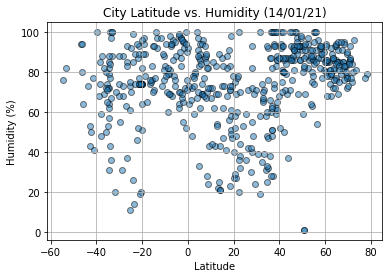

In [27]:
x2_values = weather_df["Lat"]
y2_values = weather_df["Humidity"]

# Plot scatter plot
plt.scatter(x2_values, y2_values, marker="o", edgecolors="black", alpha=0.5)

# Adding Labels
plt.title("City Latitude vs. Humidity (14/01/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Adding the grid
plt.grid()

## Remember to save PNG
plt.savefig("images/Latitude_vs_Humidity.png")

# Show plot
plt.show()

In [28]:
## After each plot add a sentence or two explaining what the code is and analyzing.
print("There doesn't appear to be much of a correlation between latitude and humidity")

There doesn't appear to be much of a correlation between latitude and humidity


## Latitude vs. Cloudiness Plot

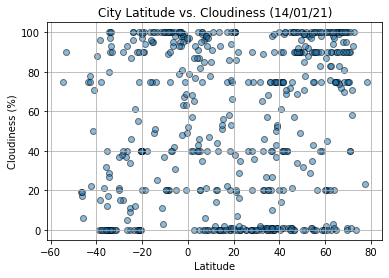

In [29]:
x3_values = weather_df["Lat"]
y3_values = weather_df["Cloudiness"]

# Plot scatter plot
plt.scatter(x3_values, y3_values, marker="o", edgecolors="black", alpha=0.5)

# Adding Labels
plt.title("City Latitude vs. Cloudiness (14/01/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Adding the grid
plt.grid()

### Remember to save PNG
plt.savefig("images/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

In [31]:
## After each plot add a sentence or two explaining what the code is and analyzing.
print("Cloudiness also doesn't show a relationship with the latitude of the city")

Cloudiness also doesn't show a relationship with the latitude of the city


## Latitude vs. Wind Speed Plot

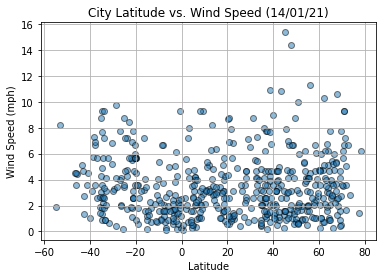

In [32]:
x4_values = weather_df["Lat"]
y4_values = weather_df["Wind Speed"]

# Plot scatter plot
plt.scatter(x4_values, y4_values, marker="o", edgecolors="black", alpha=0.5)

# Adding Labels
plt.title("City Latitude vs. Wind Speed (14/01/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Adding the grid
plt.grid()

## Remember to save PNG
plt.savefig("images/Latitude_vs_WindSpeed.png")

# Show plot
plt.show()

In [33]:
## After each plot add a sentence or two explaining what the code is and analyzing.
print("For the majority of cities it appears that the wind speed is mainly between 0 and 10mph. Some cities that have a higher latitude in the northern hemisphere experience quicker wind speeds of up to 20mph")

For the majority of cities it appears that the wind speed is mainly between 0 and 10mph. Some cities that have a higher latitude in the northern hemisphere experience quicker wind speeds of up to 20mph


## Linear Regression

In [40]:
## From hints and considerations;
## Once you have computed the linear regression for one chart, the process will be similar for all others
## As a bonus, try to create a function that will create these charts based on different parameters

In [113]:
# Need to define the linear regression plot for remainding parts, so can re-use and sub in x and y_values
# Class 6.3 activity 10

def linregplt (x_values, y_values, pos, file):
    
    # Run linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    y_predicted = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, y_predicted, "r-")
    plt.annotate(line_eq, pos, fontsize=15,color="red")
    # pos = position where line equation will be placed, figure out for each plot
    
    # Label plot
    plt.xlabel("Latitude")
    plt.ylabel(str(y_values.name))
    
    # Print r square value
    print(f"The r-value is: {rvalue**2}")
    
    # Save plot as PNG
    plt.savefig(f"images/Lat_vs_{file}.png")
    # file = file name in images, not sure how to make it more defined/readable

    # Show plot
    plt.show()

In [114]:
# Google search;
# Latitude degrees with a – sign indicate a location in the southern hemisphere and degrees with a positive number are located in the northern hemisphere
# Need to loc in northern and southern hemisphere co-ordinates

north_hem = weather_df.loc[weather_df["Lat"] > 0]
south_hem = weather_df.loc[weather_df["Lat"] < 0]

north_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-40.57,79,72,4.73,RU,1610601553
2,Evensk,61.9500,159.2333,-28.21,74,76,2.59,RU,1610601554
5,Juneau,58.3019,-134.4197,3.00,87,75,3.60,US,1610601407
7,Mubende,0.5606,31.3900,20.24,64,79,0.12,UG,1610601558
9,San Ignacio,17.1561,-89.0714,22.00,88,75,1.01,BZ,1610601559


In [115]:
south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
20,Buri,-23.7975,-48.5928,20.46,85,96,4.73,BR,1610601567
24,San Fernando del Valle de Catamarca,-28.4696,-65.7852,18.33,88,15,0.45,AR,1610601570
37,Guarujá,-23.9931,-46.2564,25.00,26,100,4.26,BR,1610601391
42,Paranhos,-23.8928,-55.4311,22.01,99,100,1.71,BR,1610601583
47,Morón,-34.6534,-58.6198,21.11,57,0,3.58,AR,1610601587


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7643561117038582


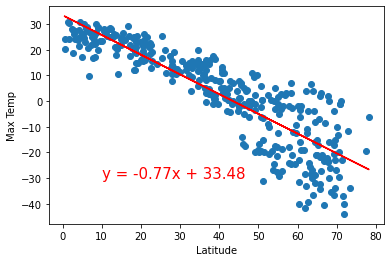

In [116]:
# Pulling values from north_hem
x_values = north_hem["Lat"]
y_values = north_hem["Max Temp"]
pos = (10, -30)
linregplt(x_values, y_values, pos, 1)

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.1481613153705644


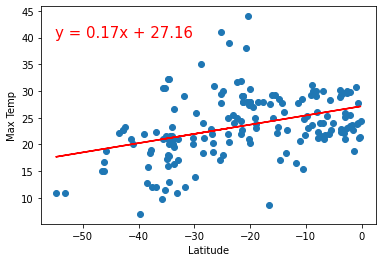

In [117]:
# Pulling values from south_hem
x_values = south_hem["Lat"]
y_values = south_hem["Max Temp"]
pos = (-55, 40)
linregplt(x_values, y_values, pos, 2)

In [118]:
## After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

print("There is a strong correlation between latitude and max temp, in the northern hemisphere as r-value > 0.7")
print("There is a very weak correlation between latitude and max temp, in the southern hemisphere as r-value < 0.3")


There is a strong correlation between latitude and max temp, in the northern hemisphere as r-value > 0.7
There is a very weak correlation between latitude and max temp, in the southern hemisphere as r-value < 0.3


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1308123888288158


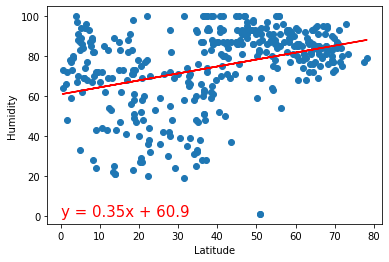

In [119]:
# Pulling values from north_hem
x_values = north_hem["Lat"]
y_values = north_hem["Humidity"]
pos = (0, 0)
linregplt(x_values, y_values, pos, 3)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.06367549691194976


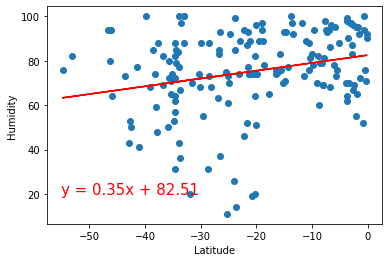

In [120]:
# Pulling values from south_hem
x_values = south_hem["Lat"]
y_values = south_hem["Humidity"]
pos = (-55, 20)
linregplt(x_values, y_values, pos, 4)

In [121]:
## After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

print("There is a very weak/no correlation between latitude and max humidity, in both the southern and northern hemispheres. For both the r-value < 0.3")


There is a very weak/no correlation between latitude and max humidity, in both the southern and northern hemispheres. For both the r-value < 0.3


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05145587807246548


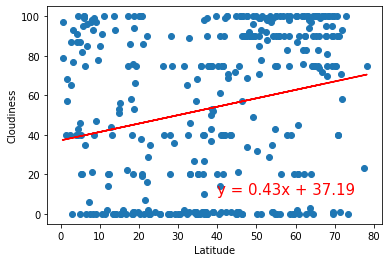

In [122]:
# Pulling values from north_hem
x_values = north_hem["Lat"]
y_values = north_hem["Cloudiness"]
pos = (40, 10)
linregplt(x_values, y_values, pos, 5)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.16558231327288775


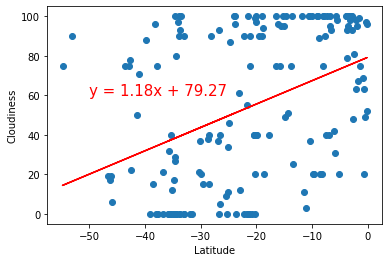

In [123]:
# Pulling values from south_hem
x_values = south_hem["Lat"]
y_values = south_hem["Cloudiness"]
pos = (-50, 60)
linregplt(x_values, y_values, pos, 6)

In [124]:
## After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.

print("There is a very weak/no correlation between latitude and cloudiness, in both the southern and northern hemispheres. For both the r-value < 0.3")

There is a very weak/no correlation between latitude and cloudiness, in both the southern and northern hemispheres. For both the r-value < 0.3


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.012070522700750942


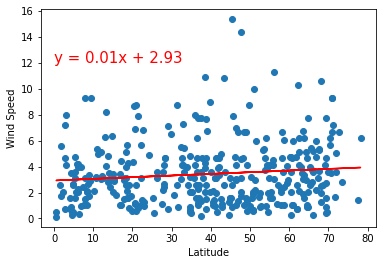

In [125]:
# Pulling values from north_hem
x_values = north_hem["Lat"]
y_values = north_hem["Wind Speed"]
pos = (0, 12)
linregplt(x_values, y_values, pos, 7)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.10528940387227155


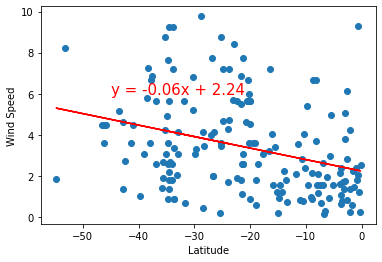

In [126]:
# Pulling values from south_hem
x_values = south_hem["Lat"]
y_values = south_hem["Wind Speed"]
pos = (-45, 6)
linregplt(x_values, y_values, pos, 8)

In [127]:
## After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.
print("There is a very weak/no correlation between latitude and windspeed, in both the southern and northern hemispheres. For both the r-value < 0.3")
print("The data seems evenly spread for cities in the southern hemisphere but shows that there are cities in the northern hemisphere that expereince high wind speeds")

There is a very weak/no correlation between latitude and windspeed, in both the southern and northern hemispheres. For both the r-value < 0.3
The data seems evenly spread for cities in the southern hemisphere but shows that there are cities in the northern hemisphere that expereince high wind speeds
